# Capstone - Data Cleaning 

## Brooke Nichols

### The focus of this capstone is to look at possible relationships between seismic activity and fracking oil wells in the Permian Basin, while the well is being fracked. 

I obtained a set of hydraulic fracturing (fracking) data from Frac Focus and seismic data from Iris, TexNet, and USGS. I will be limiting my inquiries to the Permian Basin in West Texas as Texas has the most number of fracking wells in the United States and this area of Texas is heavily known for the oil and gas industry. 

[Hydraulic Fracturing](https://www.usgs.gov/faqs/what-hydraulic-fracturing?qt-news_science_products=0#qt-news_science_products) informally referred to as “fracking,” is an oil and gas well development process that typically involves injecting water, sand, and chemicals under high pressure into a bedrock formation via the well. This process is intended to create new fractures in the rock as well as increase the size, extent, and connectivity of existing fractures. Hydraulic fracturing is a well-stimulation technique used commonly in low-permeability rocks like tight sandstone, shale, and some coal beds to increase oil and/or gas flow to a well from petroleum-bearing rock formations.

[Permian Basin](https://www.britannica.com/place/Permian-Basin)- also called West Texas Basin, large sedimentary basin in western Texas and southeastern New Mexico, U.S., noted for its rich petroleum, natural gas, and potassium deposits. Owing to its economic importance, it is one of the most well-studied geologic regions of the world. Deposits of the Permian Basin are featured in Guadalupe Mountains National Park. 

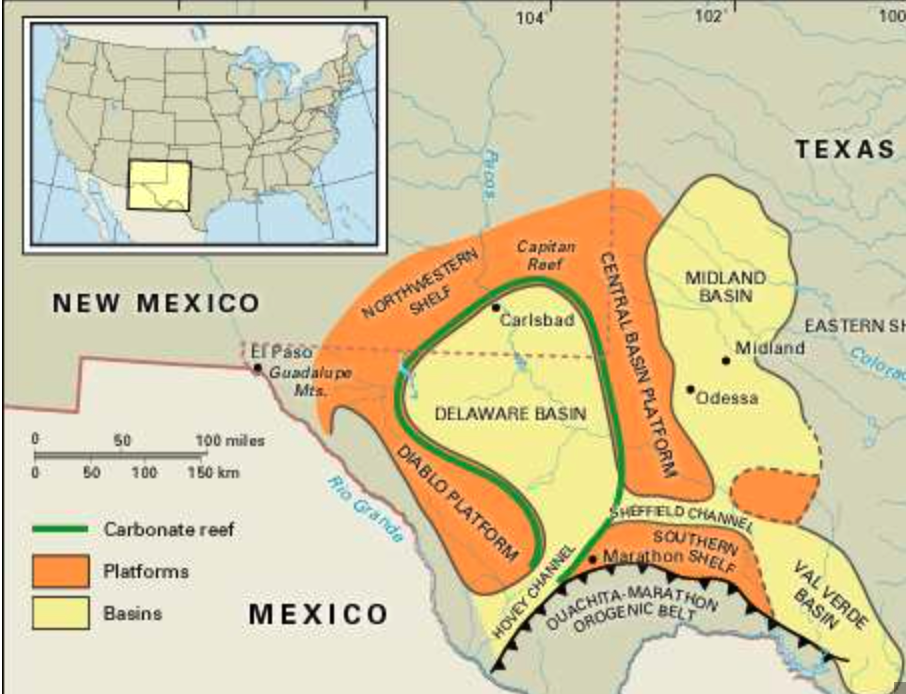

[Frac Focus](https://fracfocus.org/) is the national hydraulic fracturing chemical disclosure registry for the United States. It has been collecting data on frac wells since 2011 and is a good resource to consult if more information is wanted on how fracking works. The data download includes information on how the well was fracked, when, the operator, and the chemical supplier. 

Data Dictionary:(Only included are ones relavant to this project)

- JobStartDate - The date on which the hydraulic fracturing job was initiated.  Does not include site preparation or     setup.

- JobEndDate - The date on which the hydraulic fracturing job was completed.  Does not include site teardown.

- APINumber - The American Petroleum Institute well identification number formatted as follows xx-xxx-xxxxx0000 Where:   First two digits represent the state, second three digits represent the county, third 5 digits represent the well.

- WellName - The name of the well.

- OperatorName - The name of the operator.

- (Frac)Latitude - The lines that circle the earth horizontally, running side to side at equal distances apart on the   earth. Latitude is typically expressed in degrees North/ South.  In the FracFocus system these lines are shown in     decimal degrees and must be between 15 and 75.

- (Frac)Longitude - The lines that circle the earth vertically, running top to bottom that are equal distances apart     at the equator and merge at the geographic top and bottom of the earth.  Longitude is typically expressed in degrees   East/West. In the FracFocus system the number representing these  lines are shown in decimal degrees and must be       between -180 and -163 Note: Longitude number must be preceded by a negative sign.

- CountyName - The name of the county were the surface location of the well resides.  Calculated from the API number.

- TVD - The vertical distance from a point in the well (usually the current or final depth) to a point at the surface,   usually the elevation of the rotary kelly bushing.

- TotalBaseWaterVolume - The total volume of water used as a carrier fluid for the hydraulic fracturing job (in         gallons).

- TotalBaseNonWaterVolume - The total volume of non water components used as a carrier fluid for the hydraulic           fracturing job (in gallons)

- FederalWell - True = Yes, False = No.

- IngredientName - Name of the chemical or for Trade Secret chemicals the chemical family name.

- PercentHFJob - The amount of the ingredient in the total hydraulic fracturing volume in % by mass.

- MassIngredient - Mass of the ingredient used on frac job in lbs.

[IRIS](https://www.iris.edu/hq/) is the Incorporated Research Institutions for Seismology, a consortium of over 120 US universities dedicated to the operation of science facilities for the acquisition, management, and distribution of seismological data. It is a nonprofit organization incorporated in the state of Delaware with its primary headquarters office located in Washington, DC. Their fdsnws-event web service was used to return events (earthquake) information from catalogs originating from the NEIC and the ISC data centers.

[TexNet CISR](https://www.beg.utexas.edu/texnet-cisr/texnet) was established as a product of the 84th and 85th legislative sessions, when the Texas Legislature tasked the Bureau of Economic Geology with helping to locate and determine the origins of earthquakes in the state and, when possibly caused by human activity, seek to help prevent earthquakes from occurring in the future. The TexNet Seismic Monitoring Program was established to accomplish these goals. As part of the program, the Bureau's TexNet research team has developed the TexNet Earthquake Catalog, a dynamic mapping web page that provides information on the location of monitoring stations and recorded earthquakes across the state. The map and data include events recorded since January 1, 2017, when data collection began.

[USGS](https://www.usgs.gov/natural-hazards/earthquake-hazards/earthquakes) is the United States Geological Survey. The scientists of the USGS study the landscape of the United States, its natural resources, and the natural hazards that threaten it. You can find recent or historic earthquakes, lists, information on selected significant earthquakes, earthquake resources by state, or find webservices using their earthquake hazards page. The data pulled from here was above a 2.5 magnitude and within the latitude and longitude range for the Permian Basin. 
 
Data Dictionary:(Only included are ones relavant to this project and the three different seismic data sets were combined into these columns)

- EventDate- the date on which the event occurred

- EventTime- the time at which the event occurred

- (Seis)Latitude- central latitude point

- (Seis)Longitude- central longitude point

- Magnitude - the scale the event is measured on in one of these types ML Ms mb Mw. All magnitude scales should yield approximately the same value for any given earthquake. They were limited to anything over a 2.5.



In [1]:
#bring in packages necessary to run this notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#bring in ignore warnings for final run through
import warnings
warnings.filterwarnings('ignore')

## Frac Data Cleaning

In [2]:
#read in the first set of frac data from FracFocus
frac = pd.read_csv('data/FracFocusCSV/FracFocusRegistry_1.csv')


In [3]:
#save the other frac data files in a list as a variable
file_names = ['data/FracFocusCSV/FracFocusRegistry_2.csv', 'data/FracFocusCSV/FracFocusRegistry_3.csv', 'data/FracFocusCSV/FracFocusRegistry_4.csv',
            'data/FracFocusCSV/FracFocusRegistry_5.csv', 'data/FracFocusCSV/FracFocusRegistry_6.csv', 'data/FracFocusCSV/FracFocusRegistry_7.csv', 
            'data/FracFocusCSV/FracFocusRegistry_8.csv', 'data/FracFocusCSV/FracFocusRegistry_9.csv', 'data/FracFocusCSV/FracFocusRegistry_10.csv', 
            'data/FracFocusCSV/FracFocusRegistry_11.csv', 'data/FracFocusCSV/FracFocusRegistry_12.csv', 'data/FracFocusCSV/FracFocusRegistry_13.csv', 
            'data/FracFocusCSV/FracFocusRegistry_14.csv', 'data/FracFocusCSV/FracFocusRegistry_15.csv', 'data/FracFocusCSV/FracFocusRegistry_16.csv',
            'data/FracFocusCSV/FracFocusRegistry_17.csv', 'data/FracFocusCSV/FracFocusRegistry_18.csv', 'data/FracFocusCSV/FracFocusRegistry_19.csv', 
            'data/FracFocusCSV/FracFocusRegistry_20.csv']

In [4]:
#create placeholder dataframe then a loop to read in the other frac data files
frac_master = pd.DataFrame()

for file in file_names:
    #read in current iteration 
    frac = pd.read_csv(file)
    #concat onto frac_master 
    frac_master = pd.concat([frac_master,frac])

In [5]:
#view the dataframe
frac_master

,UploadKey,JobStartDate,JobEndDate,APINumber,StateNumber,CountyNumber,OperatorName,WellName,Latitude,Longitude,...,IngredientKey,IngredientName,CASNumber,PercentHighAdditive,PercentHFJob,IngredientComment,IngredientMSDS,MassIngredient,ClaimantCompany,DisclosureKey
0,6bc5825b-cd97-4340-80a7-6274747ae161,4/16/2013 12:00:00 AM,4/23/2013 12:00:00 AM,42311351300000,42,311,"Chesapeake Operating, Inc.",PRINCE MCM J 4H,28.594439,-98.765203,...,9b252b7b-e476-4223-8e6a-d4fed4942222,Water,007732-18-5,0.0,1.70587,NaN,False,0.0,NaN,6bc5825b-cd97-4340-80a7-6274747ae161
1,6bc5825b-cd97-4340-80a7-6274747ae161,4/16/2013 12:00:00 AM,4/23/2013 12:00:00 AM,42311351300000,42,311,"Chesapeake Operating, Inc.",PRINCE MCM J 4H,28.594439,-98.765203,...,97ddcf39-4f41-4efb-8381-9ff5f3adb4c6,Petroleum Distillate Hydrotreated Light,064742-47-8,65.0,0.05830,NaN,True,0.0,NaN,6bc5825b-cd97-4340-80a7-6274747ae161
2,6bc5825b-cd97-4340-80a7-6274747ae161,4/16/2013 12:00:00 AM,4/23/2013 12:00:00 AM,42311351300000,42,311,"Chesapeake Operating, Inc.",PRINCE MCM J 4H,28.594439,-98.765203,...,036dcf0e-fca1-42b2-a092-25d2e9fa2a63,"Crystalline Silica (Quartz Sand, Silicon Dioxide)",014808-60-7,100.0,13.05013,NaN,True,0.0,NaN,6bc5825b-cd97-4340-80a7-6274747ae161
3,6bc5825b-cd97-4340-80a7-6274747ae161,4/16/2013 12:00:00 AM,4/23/2013 12:00:00 AM,42311351300000,42,311,"Chesapeake Operating, Inc.",PRINCE MCM J 4H,28.594439,-98.765203,...,5c7b2dd7-b7f6-4da9-a8ce-8291538a5fa2,Ammonium persulfate,007775-54-0,100.0,0.00068,NaN,True,0.0,NaN,6bc5825b-cd97-4340-80a7-6274747ae161
4,6bc5825b-cd97-4340-80a7-6274747ae161,4/16/2013 12:00:00 AM,4/23/2013 12:00:00 AM,42311351300000,42,311,"Chesapeake Operating, Inc.",PRINCE MCM J 4H,28.594439,-98.765203,...,aa749b45-b006-4dd3-a2a6-8587860294f2,"Crystalline Silica (Quartz Sand, Silicon Dioxide)",014808-60-7,10.0,0.00031,NaN,True,0.0,NaN,6bc5825b-cd97-4340-80a7-6274747ae161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234051,ead37751-a53f-4ed9-99df-8cac1ebf1e15,5/23/2021 12:00:00 AM,5/23/2021 12:00:00 AM,42173346750000,42,173,Berry Petroleum,Talon #4,31.950785,-101.775302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234052,4753a32e-39cb-4994-b69b-8acb36597463,6/8/2021 12:00:00 AM,6/8/2021 12:00:00 AM,42115334560000,42,115,Pioneer Natural Resources,Echols 10 #1,32.531683,-102.096109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234053,4753a32e-39cb-4994-b69b-8acb36597463,6/8/2021 12:00:00 AM,6/8/2021 12:00:00 AM,42115334560000,42,115,Pioneer Natural Resources,Echols 10 #1,32.531683,-102.096109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234054,2241ec7e-f113-4f8e-8b61-8a74c9e03dc2,4/1/3012 12:00:00 AM,4/1/3012 12:00:00 AM,42227368950000,42,227,"Meritage Energy Company, LLC",Patterson #2713,32.175028,-101.505275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#check the frac_master size
frac_master.shape

(4734056, 39)

In [7]:
#check data
frac_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4734056 entries, 0 to 234055
Data columns (total 39 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   UploadKey                object 
 1   JobStartDate             object 
 2   JobEndDate               object 
 3   APINumber                int64  
 4   StateNumber              int64  
 5   CountyNumber             int64  
 6   OperatorName             object 
 7   WellName                 object 
 8   Latitude                 float64
 9   Longitude                float64
 10  Projection               object 
 11  TVD                      float64
 12  TotalBaseWaterVolume     float64
 13  TotalBaseNonWaterVolume  float64
 14  StateName                object 
 15  CountyName               object 
 16  FFVersion                int64  
 17  FederalWell              bool   
 18  IndianWell               bool   
 19  Source                   float64
 20  DTMOD                    float64
 21  PurposeKe

I'll be further limiting the data set to the Permian Basin at this point because it is the hot spot for oil and gas industry in Texas. I'm using the latitude and longitude lines that best fit the Permian inside of them. I limited it to Texas first so I didn't pick up any New Mexico wells. I'm also dropping the features from the data set that I do not think will be useful in looking at the data further, provide more information or there are too many nulls.

In [8]:
#drop the columns not going to be used in the Frac data
frac_master.drop(['StateNumber', 'Source', 'DTMOD', 'TradeName', 'Purpose', 'SystemApproach',
                  'IsWater', 'PurposePercentHFJob', 'PurposeIngredientMSDS', 'PercentHighAdditive', 'IngredientComment',
                  'ClaimantCompany', 'UploadKey', 'DisclosureKey', 'Projection', 'FFVersion', 'PurposeKey', 'Supplier',
                  'IngredientKey', 'CASNumber', 'IngredientMSDS', 'CountyNumber'], axis = 1, inplace = True)

In [9]:
#save the US data for modeling
frac_usa = frac_master

In [10]:
#send frac_master file to folder
#frac_usa.to_csv('data/Master/frac_usa.csv')

In [11]:
#limit to just Texas since it has the most number of frac wells
frac_master = frac_master[frac_master['StateName'] == 'Texas']

In [12]:
#drop the columns left for the US data and limiting
frac_master.drop(['StateName', 'IndianWell'], axis = 1, inplace = True)

In [13]:
#use the lat and lon to limit to Permian Basin
frac_master = frac_master[(((frac_master['Latitude'] >= 29) & (frac_master['Latitude'] <= 33)) |
                           ((frac_master['Longitude'] >= -101) & (frac_master['Longitude'] <= -105)))]


In [14]:
#check for null values
frac_master.isna().sum()

JobStartDate                 127
JobEndDate                     0
APINumber                      0
OperatorName                   0
WellName                       0
Latitude                       0
Longitude                      0
TVD                            8
TotalBaseWaterVolume          20
TotalBaseNonWaterVolume    32917
CountyName                     0
FederalWell                    0
IngredientName              2939
PercentHFJob               14528
MassIngredient             18751
dtype: int64

The null values that are here in most of these columns cannot be imputed or plugged in. These columns are specific to the frack job and saysing chemicals were used in the well that weren't or that a job went longer than it did might effect the outcome. 

In [15]:
#remove the remaining null values
frac_master.dropna(inplace = True)

In [16]:
#drop duplicates
frac_master.drop_duplicates(inplace = True)

In [17]:
#reset the frac_master index after dropping the null values and duplicates
frac_master = frac_master.reset_index(drop = True)

In [18]:
#check the data type of each column and confirm there are no null values left
frac_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408075 entries, 0 to 1408074
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   JobStartDate             1408075 non-null  object 
 1   JobEndDate               1408075 non-null  object 
 2   APINumber                1408075 non-null  int64  
 3   OperatorName             1408075 non-null  object 
 4   WellName                 1408075 non-null  object 
 5   Latitude                 1408075 non-null  float64
 6   Longitude                1408075 non-null  float64
 7   TVD                      1408075 non-null  float64
 8   TotalBaseWaterVolume     1408075 non-null  float64
 9   TotalBaseNonWaterVolume  1408075 non-null  float64
 10  CountyName               1408075 non-null  object 
 11  FederalWell              1408075 non-null  bool   
 12  IngredientName           1408075 non-null  object 
 13  PercentHFJob             1408075 non-null 

In [19]:
#change the name of the Lat and Lon columns so they don't confused with the Seis columns when combined
frac_master.rename(columns = {'Latitude':'FracLatitude','Longitude':'FracLongitude'}, inplace = True)

I will need the dates to compare against the seismic data when combining for the master data set to make sure the seismic activity occurred during the time of the well frack. Most of the times are just randomly inputted and I don't need to know when the frack starts and ends, so I won't be keeping the times in the split. Then I will change the date columns into datetime format. 

In [20]:
#view the values of the JobStartDate column
display(frac_master['JobStartDate'].value_counts())

10/21/2013 12:00:00 AM    1704
11/4/2013 12:00:00 AM     1683
9/9/2013 12:00:00 AM      1679
11/3/2014 12:00:00 AM     1674
4/16/2014 12:00:00 AM     1650
                          ... 
3/17/2020 6:00:00 AM         3
4/5/2017 12:00:00 AM         2
5/5/2019 5:00:00 AM          2
1/25/2015 6:00:00 AM         1
12/12/2014 8:00:00 AM        1
Name: JobStartDate, Length: 12970, dtype: int64

In [21]:
#split the JobStartDate column and drop the exact time the job started because in most cases it is midnight
#hold the dataframe in a temporary variable
temp_frac = frac_master['JobStartDate'].str.split(' ', expand = True)

#overwrite the old JobStartDate column with just the date data and drop the time data
frac_master['JobStartDate'] = temp_frac[0]

In [22]:
#view the values of the JobStartDate column
display(frac_master['JobEndDate'].value_counts())

4/16/2014 12:00:00 AM     1509
11/25/2014 12:00:00 AM    1479
3/19/2014 12:00:00 AM     1460
11/1/2013 12:00:00 AM     1404
6/19/2014 12:00:00 AM     1377
                          ... 
4/3/2020 9:32:00 AM          3
10/23/2019 11:25:00 AM       3
10/22/2019 6:00:00 AM        3
10/14/2019 4:53:00 AM        3
12/12/2014 9:00:00 AM        1
Name: JobEndDate, Length: 12839, dtype: int64

In [23]:
#split the JobEndDate column and drop the exact time the job ended because in most cases it is midnight
#hold the dataframe in a temporary variable
temp_frac2 = frac_master['JobEndDate'].str.split(' ', expand = True)

#overwrite the old JobEndDate column with just the date data and drop the time data
frac_master['JobEndDate'] = temp_frac2[0]

In [24]:
#change the datatype of the JobStart and JobEnd to datetime
frac_master['JobStartDate'] = frac_master['JobStartDate'].astype('datetime64')
frac_master['JobEndDate'] = frac_master['JobEndDate'].astype('datetime64')

In [25]:
#reorder the columns
cols = frac_master.columns.tolist()
cols.insert(3, cols.pop(cols.index('WellName')))
frac_master = frac_master.reindex(columns = cols)

In [26]:
#reorder the columns
cols = frac_master.columns.tolist()
cols.insert(4, cols.pop(cols.index('OperatorName')))
frac_master = frac_master.reindex(columns = cols)

In [27]:
#reorder the columns
cols = frac_master.columns.tolist()
cols.insert(5, cols.pop(cols.index('FracLatitude')))
frac_master = frac_master.reindex(columns = cols)

In [28]:
#reorder the columns
cols = frac_master.columns.tolist()
cols.insert(6, cols.pop(cols.index('FracLongitude')))
frac_master = frac_master.reindex(columns = cols)

In [29]:
#reorder the columns
cols = frac_master.columns.tolist()
cols.insert(7, cols.pop(cols.index('CountyName')))
frac_master = frac_master.reindex(columns = cols)

In [30]:
#make sure changes took and it's in the order wanted
frac_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408075 entries, 0 to 1408074
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   JobStartDate             1408075 non-null  datetime64[ns]
 1   JobEndDate               1408075 non-null  datetime64[ns]
 2   APINumber                1408075 non-null  int64         
 3   WellName                 1408075 non-null  object        
 4   OperatorName             1408075 non-null  object        
 5   FracLatitude             1408075 non-null  float64       
 6   FracLongitude            1408075 non-null  float64       
 7   CountyName               1408075 non-null  object        
 8   TVD                      1408075 non-null  float64       
 9   TotalBaseWaterVolume     1408075 non-null  float64       
 10  TotalBaseNonWaterVolume  1408075 non-null  float64       
 11  FederalWell              1408075 non-null  bool          
 12  

My eventual goal is to split the master set into two sets, after the combination, for testing and modeling. I want to have a data set that has the water based carrier fluid and non water based carrier fluid then a second data set for chemical ingredients used in the non water based carrier fluid and the percentages of their use. The goal of the second data set will be to see if the first set shows there is some significance with the non water based carrier fluid then what ingredients in that fluid are effecting it the most. Since this information comes from a form filled out by so many people and it isn't regulated as to what they put I will be trying to make the ingredients column a little more uniform for this purpose. To do this first I made everything in the column lowercase. Then I made a list of 100 of the most commonly used ingredients in fracking fluid. Then I looped over the ingredient column with the list to make the names I could more uniform, ex: crystalline silica, quartz -> crystalline silica. After that I made sure the dataframe was limited to only the rows with the ingredients that had been uniformed.  

In [31]:
#make all of the input lowercase in the IngredientName column to help make more uniform
frac_master['IngredientName'] = frac_master['IngredientName'].str.lower()

In [32]:
#eliminate the rows in the IngredientName column that will not be used in modeling
#frac_master = frac_master[frac_master.IngredientName != 'proprietary']

In [33]:
#make master ingredients list to help make IngredientNames more uniform
#list of 100 of some of the most commonly used chemicals
ingredients=['2,2-dibromo-3-nitrilopropionamide', '2-methyl-4-isothiazolin-3-one', 
             '5-chloro-2-methyl-4-isothiazolin-3-one', 'acetic acid', 'acetic anhydride', 'alcohol ethoxylated',
             'alkyl benzene sulfonic acid', 'aqua ammonia', 'ammonium bisulfite', 'quaternary ammonium',
             'ammonium persulfate', 'amporphous silica', 'benzoic acid', 'boric acid', 'boric oxide', 'calcium chloride',
             'calcium oxide', 'carboxymethylhydroxypropyl guar', 'choline chloride', 'cinnamaldehyde',
             'citric acid', 'crystalline silica', 'cupric chloride dihydrate', 'cured resin', 'cyclohexane',
             'dazomet', 'diethylene glycol', 'd-limonene', 'enzyme', 'ethoxylated alcohol', 'ethyl acetate',
             'ethyl alcohol', 'ethylbenzene', 'ethylene glycol', 'formic acid', 'glutaraldehyde', 'glycerol',
             'glycol ethers', 'guar gum', 'hydrochloric acid', 'isopropanol', 'isopropyl alcohol', 'methanol',
             'methyl alcohol', 'methyl salicylate', 'n-butanol', 'phenolic resin', 'polyethylene glycol',
             'polysaccharide blend', 'potassium carbonate', 'potassium chloride', 'potassium hydroxide',
             'propargyl alcohol', 'propylene glycol', 'sodium bicarbonate', 'sodium bromide', 'sodium hydroxide',
             'sulfuric acid', 'surfactant', 'talc', 'tributyl tetradecyl phosphonium chloride',
             'tetrakis phosphonium sulfate', 'tetramethyl ammonium chloride', 'ammonium chloride', 'water',
             'petroleum distillate', 'diatomaceous earth', 'essential oils', 'ethanol', 'titanium oxide', 'iron oxide',
             'aluminum oxide', 'sodium tetraborate', 'formaldehyde', 'bentonite', 'olefin', 'hydrogen peroxide',
             'potassium acetate', 'magnesium peroxide', 'magnesium hydroxide', 'sodium chloride', 'hydrogen chloride',
             'phosphoric acid', 'nitrogen', 'ammonium phosphate', 'fatty acid', 'potassium iodide', 'sodium carbonate',
             'acetone', 'calcium hydroxide', 'sodium iodide', 'sodium bisulfate', 'benzyl chloride', 'titanium dioxide',
             'turpene', 'ammonium fluoride', 'magnesium silicate', 'silicon dioxide', 'ammonia', 'sodium erythorbate']


In [34]:
#make the IngredientName column more uniform
for ingredient in ingredients:
     frac_master.loc[(frac_master['IngredientName'] == (ingredient)), 'IngredientName'] = ingredient

In [35]:
#limit dataframe to only the uniform ingredient columns
#check for the uniform rows and make a list
uniform = list(frac_master['IngredientName'].isin(ingredients))
#filter
frac_master = frac_master.loc[uniform, :]

In [36]:
frac_master['IngredientName'].value_counts()

water                           134269
methanol                         45241
ethylene glycol                  22941
sodium chloride                  20927
sodium hydroxide                 20073
                                 ...  
glycol ethers                       44
methyl salicylate                   38
n-butanol                           14
turpene                             13
tetrakis phosphonium sulfate        10
Name: IngredientName, Length: 96, dtype: int64

In [37]:
#check final frac shape
frac_master.shape

(569472, 15)

In [38]:
#send frac_master file to folder
#frac_master.to_csv('data/Master/frac_master.csv')

## Seismic Data Cleaning

### Read in Iris Data and Clean

With the seismic data sets I knew that I needed them to be in the same order and form in the end so that I could combine them into one big dataset. In each of the three data sets I used for seismic activity I went the same basic steps: 1. Read in data, 2. Check shape and information, 3. Limit to the area of Permian Basin and to a Magnitude of above 2.5, 4. Drop uneeded columns, 5. Check for nulls, 6. Rename the columns so they would be the same, 7. Split the date column if necessary, 8. Change the type of the columns if needed, 9. Reorder the columns to all be in the same order.

In [39]:
#read in the seismic data from Iris and check the dataframe
iris = pd.read_csv("data/Seismic/seismic.txt", sep='|', skiprows = 4) 
iris

,EventID,Time,Latitude,Longitude,Depth,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
0,11310330,2020-09-14T23:56:01Z,58.211300,-151.541200,30.900000,"us,ak",NEIC PDE,ak,ak020bv2oiki,ML,2.70,us,"KODIAK ISLAND REGION, ALASKA"
1,11310327,2020-09-14T23:49:03Z,59.347500,-137.937400,0.600000,ak,NEIC PDE,ak,ak020bv2n0ns,ml,1.60,us,SOUTHEASTERN ALASKA
2,11310324,2020-09-14T23:48:12Z,19.192833,-155.477997,33.360001,hv,NEIC PDE,hv,hv72134161,Md,1.78,HV,HAWAII
3,11310707,2020-09-14T23:48:06Z,38.293833,-112.765000,7.810000,uu,NEIC PDE,uu,uu60411197,Md,0.19,UU,UTAH
4,11310323,2020-09-14T23:40:47Z,35.037833,-117.673833,-0.820000,ci,NEIC PDE,ci,ci38689154,Ml,1.25,CI,CENTRAL CALIFORNIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731654,9079371,2013-04-01T00:03:06Z,38.688200,25.463700,23.200000,ATH,ISC,ISC,6030254,ML,2.30,ATH,AEGEAN SEA
1731655,9079370,2013-04-01T00:02:25Z,35.890000,141.050000,17.000000,JMA,ISC,ISC,4833701,NaN,2.70,JMA,"NEAR EAST COAST OF HONSHU, JAPAN"
1731656,9079369,2013-04-01T00:01:36Z,42.498300,13.337300,14.100000,ROM,ISC,ISC,6339517,ML,1.50,ROM,CENTRAL ITALY
1731657,9079368,2013-04-01T00:01:03Z,39.574700,75.531900,0.000000,NNC,ISC,ISC,3072082,mb,3.30,NNC,"SOUTHERN XINJIANG, CHINA"


In [40]:
#check size of Seis data
iris.shape

(1731659, 13)

In [41]:
#check data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731659 entries, 0 to 1731658
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   EventID            int64  
 1   Time               object 
 2   Latitude           float64
 3   Longitude          float64
 4   Depth              float64
 5   Author             object 
 6   Catalog            object 
 7   Contributor        object 
 8   ContributorID      object 
 9   MagType            object 
 10  Magnitude          float64
 11  MagAuthor          object 
 12  EventLocationName  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 171.7+ MB


In [42]:
#limit the iris data to just Texas 
iris = iris[iris['EventLocationName'].str.contains('TEXAS', na = False)]

In [43]:
#use the lat and lon to limit to the Permian Basin
iris = iris[(((iris['Latitude'] >= 29) & (iris['Latitude'] <= 33)) |
             ((iris['Longitude'] >= -101) & (iris['Longitude'] <= -105)))]


In [44]:
#limit to magnitudes above a 2.5
iris = iris[(iris['Magnitude'] >= 2.5)]

In [45]:
#drop the columns not going to be used in the Seis data
iris.drop(['Author', 'Catalog', 'Contributor', 'ContributorID', 'Depth', 'MagType', 'MagAuthor',
           'EventLocationName'], axis = 1, inplace = True)

In [46]:
#check for nulls
iris.isna().sum()

EventID      0
Time         0
Latitude     0
Longitude    0
Magnitude    0
dtype: int64

In [47]:
#rename the columns so they will match when combining for the master
iris.rename(columns = {'Latitude':'SeisLatitude','Longitude':'SeisLongitude'}, inplace = True)

In [48]:
#view the values of the Time column
display(iris['Time'].value_counts())

2017-08-21T09:44:02Z    1
2019-08-31T13:37:56Z    1
2020-08-18T03:12:35Z    1
2015-02-19T20:31:20Z    1
2014-12-31T22:06:21Z    1
                       ..
2014-12-17T22:19:00Z    1
2020-02-19T20:54:44Z    1
2017-08-04T17:05:36Z    1
2014-01-20T15:04:38Z    1
2020-09-03T16:05:18Z    1
Name: Time, Length: 547, dtype: int64

In [49]:
##split the Time column into EventDate and EventTime for easier comparison with Frac dates later
#hold the dataframe in a temporary variable
temp_iris = iris['Time'].str.split('T', expand = True)

#create new date and time columns
iris['EventDate'] = temp_iris[0]
iris['EventTime'] = temp_iris[1]

In [50]:
#change the date column type to datetime
iris['EventDate'] = iris['EventDate'].astype('datetime64')

In [51]:
#drop the Z from the EventTime values
temp_i = iris['EventTime'].str.split('Z', expand = True)

iris['EventTime'] = temp_i[0]

In [52]:
#drop the original time column that was the combined EventDate and EventTime
iris.drop(['Time'], axis = 1, inplace = True)

In [53]:
#reorder the columns
cols = iris.columns.tolist()
cols.insert(1, cols.pop(cols.index('EventDate')))
iris = iris.reindex(columns = cols)

In [54]:
#reorder the columns
cols = iris.columns.tolist()
cols.insert(2, cols.pop(cols.index('EventTime')))
iris = iris.reindex(columns = cols)

In [55]:
#make sure the changes took and it's in the order wanted
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 17 to 1691745
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EventID        547 non-null    int64         
 1   EventDate      547 non-null    datetime64[ns]
 2   EventTime      547 non-null    object        
 3   SeisLatitude   547 non-null    float64       
 4   SeisLongitude  547 non-null    float64       
 5   Magnitude      547 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 29.9+ KB


### Read in TexNet Data and Clean

In [56]:
#read in the seismic data from TexNet and check the dataframe
txnet = pd.read_csv("data/Seismic/texnet_events.csv") 
txnet

,EventID,Evaluation Status,Origin Date,Origin Time,Magnitude,Moment Magnitude,Latitude (WGS84),Latitude Error (km),Longitude (WGS84),Longitude Error (km),...,Nodal Plane 1 - Dip,Nodal Plane 1 - Rake,Nodal Plane 2 - Strike,Nodal Plane 2 - Dip,Nodal Plane 2 - Rake,Focal Mechanism Method ID,Focal Mechanism - Azimuthal Gap,Focal Mechanism - Misfit,Maximum Station Distance (km),Last Updated
0,texnet2020sdpm,final,2020-09-15,02:52:14,2.5,NaN,31.7268,1.0,-104.3388,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.782932,2020-09-15 13:45:52
1,texnet2020sdnu,final,2020-09-15,02:01:10,0.7,NaN,31.8686,0.8,-101.9092,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.885214,2020-09-16 19:06:00
2,texnet2020sdms,final,2020-09-15,01:28:30,1.8,NaN,31.9620,0.9,-102.3765,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.354283,2020-09-15 21:00:12
3,texnet2020sdhe,final,2020-09-14,22:40:48,2.6,NaN,31.7231,1.0,-104.3420,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.637031,2020-09-15 14:25:07
4,texnet2020sdgi,final,2020-09-14,22:15:21,1.7,NaN,31.7345,0.9,-104.0997,0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.646195,2020-09-15 17:55:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9170,texnet2017awsf,final,2017-01-13,10:11:24,0.8,NaN,31.4835,1.3,-103.5758,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384.014412,2018-06-22 00:29:01
9171,texnet2017asxi,final,2017-01-11,08:13:34,1.6,NaN,31.2753,6.1,-103.3454,4.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.317040,2018-06-17 03:23:30
9172,texnet2017aqxa,final,2017-01-10,05:46:47,1.6,NaN,32.6706,0.8,-97.2467,0.8,...,83.0,-162.0,1.0,72.0,-7.0,first motion,NaN,NaN,73.466137,2017-10-11 20:38:12
9173,texnet2017amvt,final,2017-01-08,00:37:34,1.5,NaN,32.6935,0.6,-97.3078,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.724009,2017-10-12 20:57:21


In [57]:
#check the shape of the data
txnet.shape

(9175, 30)

In [58]:
#check the data
txnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9175 entries, 0 to 9174
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   EventID                                          9175 non-null   object 
 1   Evaluation Status                                9175 non-null   object 
 2   Origin Date                                      9175 non-null   object 
 3   Origin Time                                      9175 non-null   object 
 4   Magnitude                                        9175 non-null   float64
 5   Moment Magnitude                                 1 non-null      float64
 6   Latitude (WGS84)                                 9175 non-null   float64
 7   Latitude Error (km)                              9175 non-null   float64
 8   Longitude (WGS84)                                9175 non-null   float64
 9   Longitude Error (km)          

In [59]:
#use the lat and lon to limit to the Permian Basin
txnet = txnet[(((txnet['Latitude (WGS84)'] >= 29) & (txnet['Latitude (WGS84)'] <= 33)) |
               ((txnet['Longitude (WGS84)'] >= -101) & (txnet['Longitude (WGS84)'] <= -105)))]


In [60]:
#limit to magnitudes above a 2.5
txnet = txnet[(txnet['Magnitude'] >= 2.5)]

In [61]:
#drop the columns not going to be used in the Seis data
txnet.drop(['Evaluation Status', 'Moment Magnitude', 'Latitude Error (km)', 'Longitude Error (km)',
            'Depth of Hypocenter (Km.  Rel to MSL)', 'Depth of Hypocenter (Km. Rel to Ground Surface)',
            'Depth Uncertainty','RMS', 'UsedPhaseCount','UsedStationCount', 'Author', 'EventType', 'LocationName',
            'Nodal Plane 1 - Strike', 'Nodal Plane 1 - Dip','Nodal Plane 1 - Rake', 'Nodal Plane 2 - Strike',
            'Nodal Plane 2 - Dip', 'Nodal Plane 2 - Rake', 'Focal Mechanism Method ID',
            'Focal Mechanism - Azimuthal Gap', 'Focal Mechanism - Misfit', 'Maximum Station Distance (km)',
            'Last Updated'], axis = 1, inplace = True)

In [62]:
#check for null values
txnet.isna().sum()

EventID              0
Origin Date          0
Origin Time          0
Magnitude            0
Latitude (WGS84)     0
Longitude (WGS84)    0
dtype: int64

In [63]:
#rename the columns so they will match when combining for the master
txnet.rename(columns = {'Latitude (WGS84)':'SeisLatitude','Longitude (WGS84)':'SeisLongitude', 
                        'Origin Date':'EventDate', 'Origin Time':'EventTime'}, inplace = True)

In [64]:
#change the date column type to datetime
txnet['EventDate'] = txnet['EventDate'].astype('datetime64')

In [65]:
#reorder the columns
cols = txnet.columns.tolist()
cols.insert(5, cols.pop(cols.index('Magnitude')))
txnet = txnet.reindex(columns = cols)

In [66]:
#make sure the changes took and it's in the order wanted
txnet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 8867
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EventID        213 non-null    object        
 1   EventDate      213 non-null    datetime64[ns]
 2   EventTime      213 non-null    object        
 3   SeisLatitude   213 non-null    float64       
 4   SeisLongitude  213 non-null    float64       
 5   Magnitude      213 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 11.6+ KB


### Read in USGS Data and Clean

In [67]:
#read in the seismic data from TexNet and check the dataframe
usgs = pd.read_csv("data/Seismic/usgs.csv") 
usgs

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-09-14T22:40:48.419Z,31.7208,-104.3528,3.78,2.8,ml,NaN,59,0.068,0.49,...,2020-09-21T23:09:30.443Z,"50 km S of Whites City, New Mexico",earthquake,1.2,2.6,0.071,80.0,reviewed,us,us
1,2020-09-14T14:14:42.357Z,31.2731,-103.3649,3.72,3.2,ml,NaN,28,0.036,0.65,...,2020-09-14T19:36:54.634Z,"19 km ESE of Lindsay, Texas",earthquake,0.8,2.4,0.039,86.0,reviewed,us,us
2,2020-09-14T14:06:31.911Z,31.7008,-104.1427,5.00,2.6,ml,NaN,49,0.100,0.57,...,2020-09-14T15:09:42.040Z,"51 km W of Mentone, Texas",earthquake,0.7,1.4,0.043,72.0,reviewed,us,us
3,2020-09-14T06:05:13.153Z,31.6985,-104.1321,7.64,2.5,ml,NaN,49,0.092,0.26,...,2020-10-10T13:35:54.040Z,"50 km W of Mentone, Texas",earthquake,1.2,3.9,0.074,76.0,reviewed,us,us
4,2020-09-10T03:29:25.594Z,31.6568,-104.3178,5.00,3.1,ml,NaN,59,0.117,0.49,...,2020-09-14T02:22:29.308Z,"57 km S of Whites City, New Mexico",earthquake,0.8,1.7,0.064,82.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2015-03-21T05:52:51.320Z,31.0760,-103.1729,1.90,2.8,mb_lg,NaN,93,1.512,0.27,...,2015-06-09T21:30:00.040Z,"34km NW of Fort Stockton, Texas",earthquake,3.1,7.2,0.208,12.0,reviewed,us,us
417,2014-12-06T07:17:15.190Z,31.0306,-103.3135,5.00,2.9,mb_lg,NaN,91,1.320,0.71,...,2015-02-28T02:16:10.040Z,"44km WNW of Fort Stockton, Texas",earthquake,3.5,2.0,0.136,26.0,reviewed,us,us
418,2014-11-28T04:16:58.580Z,29.3590,-102.5222,14.55,3.4,mb_lg,NaN,88,0.999,0.76,...,2015-02-24T00:35:09.040Z,"87km S of Sanderson, Texas",earthquake,5.3,7.5,0.085,60.0,reviewed,us,us
419,2014-06-28T13:01:15.230Z,31.2001,-103.2524,5.00,2.9,mb_lg,NaN,95,1.187,1.20,...,2014-09-26T11:49:42.000Z,"33km SE of Pecos, Texas",earthquake,NaN,2.0,0.074,55.0,reviewed,us,us


In [68]:
#check data shape
usgs.shape

(421, 22)

In [69]:
#check data
usgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             421 non-null    object 
 1   latitude         421 non-null    float64
 2   longitude        421 non-null    float64
 3   depth            421 non-null    float64
 4   mag              421 non-null    float64
 5   magType          421 non-null    object 
 6   nst              1 non-null      float64
 7   gap              421 non-null    int64  
 8   dmin             420 non-null    float64
 9   rms              421 non-null    float64
 10  net              421 non-null    object 
 11  id               421 non-null    object 
 12  updated          421 non-null    object 
 13  place            421 non-null    object 
 14  type             421 non-null    object 
 15  horizontalError  419 non-null    float64
 16  depthError       421 non-null    float64
 17  magError        

In [70]:
#limit the usgs data to just Texas 
usgs = usgs[usgs['place'].str.contains('Texas', na = False)]

In [71]:
#drop the columns not going to be used for Seis data
usgs.drop(['depth', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'updated', 'place', 'type', 'horizontalError',
           'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource'], axis = 1, inplace = True)

In [72]:
#check for null values
usgs.isna().sum()

time         0
latitude     0
longitude    0
mag          0
id           0
dtype: int64

In [73]:
#rename the columns so they will match when combining for the master
usgs.rename(columns = {'latitude':'SeisLatitude', 'longitude':'SeisLongitude', 'mag':'Magnitude', 'id':'EventID'}, inplace = True)

In [74]:
#view the values of the time column
display(usgs['time'].value_counts())

2020-01-24T07:20:24.850Z    1
2019-02-16T14:59:42.963Z    1
2019-11-01T23:28:15.382Z    1
2020-01-02T16:03:51.348Z    1
2020-05-10T11:16:21.313Z    1
                           ..
2020-01-20T16:59:01.454Z    1
2020-05-21T11:50:18.213Z    1
2015-11-10T21:43:03.730Z    1
2019-01-03T06:09:09.260Z    1
2020-06-11T07:15:56.301Z    1
Name: time, Length: 338, dtype: int64

In [75]:
##split the time column into EventDate and EventTime for easier comparison with Frac dates later
#hold the dataframe in a temporary variable
temp_usgs = usgs['time'].str.split('T', expand = True)

#create new date and time columns
usgs['EventDate'] = temp_usgs[0]
usgs['EventTime'] = temp_usgs[1]

In [76]:
#change the date column type to datetime
usgs['EventDate'] = usgs['EventDate'].astype('datetime64')

In [77]:
#drop the Z from the EventTime values
temp_u = usgs['EventTime'].str.split('.', expand = True)

usgs['EventTime'] = temp_u[0]

In [78]:
#drop the original time column that was the combined EventDate and EventTime
usgs.drop(['time'], axis = 1, inplace = True)

In [79]:
#reorder the columns
cols = usgs.columns.tolist()
cols.insert(0, cols.pop(cols.index('EventID')))
usgs = usgs.reindex(columns = cols)

In [80]:
#reorder the columns
cols = usgs.columns.tolist()
cols.insert(1, cols.pop(cols.index('EventDate')))
usgs = usgs.reindex(columns = cols)

In [81]:
#reorder the columns
cols = usgs.columns.tolist()
cols.insert(2, cols.pop(cols.index('EventTime')))
usgs = usgs.reindex(columns = cols)

In [82]:
#make sure the changes took and it's in the order wanted
usgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 1 to 420
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EventID        338 non-null    object        
 1   EventDate      338 non-null    datetime64[ns]
 2   EventTime      338 non-null    object        
 3   SeisLatitude   338 non-null    float64       
 4   SeisLongitude  338 non-null    float64       
 5   Magnitude      338 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 18.5+ KB


### Combine the Seismic Datasets to Get Master

At this point all three of the seismic data sets have gone through the same basic cleaning steps to make sure they have all the same names and types. I combined them all to make a master seismic data set and then checked for any possible duplicates dropping, those that did exist

In [83]:
#merge the two seismic data sets to make the seismic master
seis_master = pd.concat([iris, txnet, usgs], axis = 0).reset_index(drop = True)
seis_master

,EventID,EventDate,EventTime,SeisLatitude,SeisLongitude,Magnitude
0,11310307,2020-09-14,22:40:48,31.7208,-104.3528,2.8
1,11310024,2020-09-14,14:14:42,31.2731,-103.3649,3.2
2,11310025,2020-09-14,14:06:31,31.7008,-104.1427,2.6
3,11310615,2020-09-14,06:05:13,31.6985,-104.1321,2.5
4,11307800,2020-09-10,03:29:25,31.6568,-104.3178,3.1
...,...,...,...,...,...,...
1093,us10001pcg,2015-03-21,05:52:51,31.0760,-103.1729,2.8
1094,usc000t48d,2014-12-06,07:17:15,31.0306,-103.3135,2.9
1095,usb000t0t9,2014-11-28,04:16:58,29.3590,-102.5222,3.4
1096,usc000rn9z,2014-06-28,13:01:15,31.2001,-103.2524,2.9


In [84]:
#rename for visuals
seis_master_events = seis_master

In [85]:
#send seis master with EventID to file for visuals
seis_master.to_csv('data/Master/seis_master_events.csv')

In [86]:
#drop EventID
seis_master.drop(['EventID'], axis = 1, inplace = True)

In [87]:
#check for duplicate seismic activity
seis_master.duplicated().sum()

145

In [88]:
#drop duplicates
seis_master.drop_duplicates(inplace = True)

In [89]:
#reset index after dropping duplicates
seis_master = seis_master.reset_index(drop = True)

In [90]:
#check data
seis_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EventDate      953 non-null    datetime64[ns]
 1   EventTime      953 non-null    object        
 2   SeisLatitude   953 non-null    float64       
 3   SeisLongitude  953 non-null    float64       
 4   Magnitude      953 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 37.4+ KB


In [91]:
seis_master.shape

(953, 5)

In [92]:
#send seis_master file to folder
#seis_master.to_csv('data/Master/seis_master.csv')

## Combining the Datasets

In [93]:
#set the lat and lon variables to combine the frac and seis masters 
lat = seis_master.SeisLatitude.values
lon = seis_master.SeisLongitude.values
lath = frac_master.FracLatitude.values + 1
latl = frac_master.FracLatitude.values - 1
lonh = frac_master.FracLongitude.values + 1
lonl = frac_master.FracLongitude.values - 1

In [94]:
#combine the frac and seis data to make a master file using the lat and lon coordinates within one degree either way
i, j = np.where((lat[:, None] >= latl) & (lat[:, None] <= lath) &
                (lon[:, None] >= lonl) & (lon[:, None] <= lonh))
master = pd.DataFrame(
    np.column_stack([seis_master.values[i], frac_master.values[j]]),
    columns = seis_master.columns.append(frac_master.columns))

In [95]:
#check the new master dataframe
master

,EventDate,EventTime,SeisLatitude,SeisLongitude,Magnitude,JobStartDate,JobEndDate,APINumber,WellName,OperatorName,FracLatitude,FracLongitude,CountyName,TVD,TotalBaseWaterVolume,TotalBaseNonWaterVolume,FederalWell,IngredientName,PercentHFJob,MassIngredient
0,2020-09-14,22:40:48,31.7208,-104.353,2.8,2013-04-22,2013-04-24,42301318850000,Bullhead 55-1-39 4H,Anadarko Petroleum Corporation,31.9118,-103.749,Loving,8296,5.08592e+06,0,True,water,0.000731851,329.461
1,2020-09-14,22:40:48,31.7208,-104.353,2.8,2013-04-22,2013-04-24,42301318850000,Bullhead 55-1-39 4H,Anadarko Petroleum Corporation,31.9118,-103.749,Loving,8296,5.08592e+06,0,True,hydrochloric acid,0.105144,47333
2,2020-09-14,22:40:48,31.7208,-104.353,2.8,2013-04-22,2013-04-24,42301318850000,Bullhead 55-1-39 4H,Anadarko Petroleum Corporation,31.9118,-103.749,Loving,8296,5.08592e+06,0,True,methanol,3.67233e-05,16.532
3,2020-09-14,22:40:48,31.7208,-104.353,2.8,2013-04-22,2013-04-24,42301318850000,Bullhead 55-1-39 4H,Anadarko Petroleum Corporation,31.9118,-103.749,Loving,8296,5.08592e+06,0,True,ammonium chloride,0.00162556,731.786
4,2020-09-14,22:40:48,31.7208,-104.353,2.8,2013-04-22,2013-04-24,42301318850000,Bullhead 55-1-39 4H,Anadarko Petroleum Corporation,31.9118,-103.749,Loving,8296,5.08592e+06,0,True,propargyl alcohol,3.06087e-05,13.779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93299554,2015-05-14,17:41:14,29.3928,-102.558,4,2018-07-09,2018-07-28,42443313500000,ACU 37 -1,Brahman Resource Partners LLC,30.3597,-102.192,Terrell,13795,6.58738e+06,0,False,ammonium chloride,0.00639,0
93299555,2015-05-14,17:41:14,29.3928,-102.558,4,2018-07-09,2018-07-28,42443313500000,ACU 37 -1,Brahman Resource Partners LLC,30.3597,-102.192,Terrell,13795,6.58738e+06,0,False,glutaraldehyde,0.00704,0
93299556,2015-05-14,17:41:14,29.3928,-102.558,4,2018-07-09,2018-07-28,42443313500000,ACU 37 -1,Brahman Resource Partners LLC,30.3597,-102.192,Terrell,13795,6.58738e+06,0,False,ethylene glycol,0.04755,0
93299557,2015-05-14,17:41:14,29.3928,-102.558,4,2018-07-09,2018-07-28,42443313500000,ACU 37 -1,Brahman Resource Partners LLC,30.3597,-102.192,Terrell,13795,6.58738e+06,0,False,hydrochloric acid,0.10091,0


In [96]:
#check the data types of the new master dataframe
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93299559 entries, 0 to 93299558
Data columns (total 20 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   EventDate                datetime64[ns]
 1   EventTime                object        
 2   SeisLatitude             object        
 3   SeisLongitude            object        
 4   Magnitude                object        
 5   JobStartDate             datetime64[ns]
 6   JobEndDate               datetime64[ns]
 7   APINumber                object        
 8   WellName                 object        
 9   OperatorName             object        
 10  FracLatitude             object        
 11  FracLongitude            object        
 12  CountyName               object        
 13  TVD                      object        
 14  TotalBaseWaterVolume     object        
 15  TotalBaseNonWaterVolume  object        
 16  FederalWell              object        
 17  IngredientName           

In [97]:
#reset the column datatypes
master['SeisLatitude'] = master['SeisLatitude'].astype('float64')
master['SeisLongitude'] = master['SeisLongitude'].astype('float64')
master['FracLatitude'] = master['FracLatitude'].astype('float64')
master['FracLongitude'] = master['FracLongitude'].astype('float64')
master['Magnitude'] = master['Magnitude'].astype('float64')
master['APINumber'] = master['APINumber'].astype('int64')
master['TVD'] = master['TVD'].astype('float64')
master['TotalBaseWaterVolume'] = master['TotalBaseWaterVolume'].astype('float64')
master['TotalBaseNonWaterVolume'] = master['TotalBaseNonWaterVolume'].astype('float64')
master['FederalWell'] = master['FederalWell'].astype('bool')
master['PercentHFJob'] = master['PercentHFJob'].astype('float64')
master['MassIngredient'] = master['MassIngredient'].astype('float64')

In [98]:
#make sure that the seismic event happened during the time the well was being fracked
master = master[(master['JobStartDate'] <= master['EventDate']) & (master['JobEndDate'] >= master['EventDate'])]

In [99]:
#drop any duplicates that have cropped up
master.drop_duplicates(inplace = True)

In [100]:
#reset the master index after dropping the duplicates
master = master.reset_index(drop = True)

In [101]:
#binarize the FederalWell column
master['FederalWell'] = np.where(master['FederalWell'] == True,1,0)
master

,EventDate,EventTime,SeisLatitude,SeisLongitude,Magnitude,JobStartDate,JobEndDate,APINumber,WellName,OperatorName,FracLatitude,FracLongitude,CountyName,TVD,TotalBaseWaterVolume,TotalBaseNonWaterVolume,FederalWell,IngredientName,PercentHFJob,MassIngredient
0,2020-09-10,03:29:25,31.6568,-104.3178,3.1,2020-08-07,2020-09-10,42301347900000,Roosterfish 53-2-43 LOV Unit 8H,Shell Oil Company affiliate,31.788461,-103.594571,Loving,11479.0,8455038.0,0.0,0,water,79.414839,7.051502e+07
1,2020-09-10,03:29:25,31.6568,-104.3178,3.1,2020-08-07,2020-09-10,42301347900000,Roosterfish 53-2-43 LOV Unit 8H,Shell Oil Company affiliate,31.788461,-103.594571,Loving,11479.0,8455038.0,0.0,0,glutaraldehyde,0.002363,2.097827e+03
2,2020-09-10,03:29:25,31.6568,-104.3178,3.1,2020-08-07,2020-09-10,42301347900000,Roosterfish 53-2-43 LOV Unit 8H,Shell Oil Company affiliate,31.788461,-103.594571,Loving,11479.0,8455038.0,0.0,0,formic acid,0.000004,3.786360e+00
3,2020-09-10,03:29:25,31.6568,-104.3178,3.1,2020-08-07,2020-09-10,42301347900000,Roosterfish 53-2-43 LOV Unit 8H,Shell Oil Company affiliate,31.788461,-103.594571,Loving,11479.0,8455038.0,0.0,0,cinnamaldehyde,0.000004,3.915100e+00
4,2020-09-10,03:29:25,31.6568,-104.3178,3.1,2020-08-07,2020-09-10,42301347900000,Roosterfish 53-2-43 LOV Unit 8H,Shell Oil Company affiliate,31.788461,-103.594571,Loving,11479.0,8455038.0,0.0,0,ethylene glycol,0.000012,1.082899e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430495,2016-02-20,07:53:53,31.2258,-103.3279,3.3,2016-01-04,2018-01-20,42389360250000,FRIO STATE UNIT 221-222W 1H,Primexx Operating Corporation,31.039300,-103.579921,Reeves,9922.0,24410160.0,0.0,0,methanol,0.013327,3.058400e+04
430496,2016-02-20,07:53:53,31.2258,-103.3279,3.3,2016-01-04,2018-01-20,42389360250000,FRIO STATE UNIT 221-222W 1H,Primexx Operating Corporation,31.039300,-103.579921,Reeves,9922.0,24410160.0,0.0,0,ethanol,0.074920,1.719280e+05
430497,2016-02-20,07:53:53,31.2258,-103.3279,3.3,2016-01-04,2018-01-20,42389360250000,FRIO STATE UNIT 221-222W 1H,Primexx Operating Corporation,31.039300,-103.579921,Reeves,9922.0,24410160.0,0.0,0,hydrochloric acid,0.255589,5.865300e+05
430498,2016-02-20,07:53:53,31.2258,-103.3279,3.3,2016-01-04,2018-01-20,42389360250000,FRIO STATE UNIT 221-222W 1H,Primexx Operating Corporation,31.039300,-103.579921,Reeves,9922.0,24410160.0,0.0,0,water,0.933877,2.143087e+06


In [102]:
#check the final data shape
master.shape

(430500, 20)

In [103]:
#send master file to folder
#master.to_csv('data/Master/master.csv')